**Description:** 

This notebook demonstrates the future price prediction for different stocks using recurrent neural networks in tensorflow. Recurrent neural networks with basic, LSTM or GRU cells are implemented. 

**Reference:**  
https://github.com/BenjiKCF/Neural-Net-with-Financial-Time-Series-Data

[LSTM_Stock_prediction-20170507 by BenF](https://www.kaggle.com/benjibb/lstm-stock-prediction-20170507/notebook)

# 1. Libraries and settings <a class="anchor" id="1-bullet"></a> 

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/Applications/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/Users/huangchenchen/Desktop/Columbia/2018 Fall/Deep learning/Project: ['.DS_Store', '2D CNN.docx', 'Autoencoder', 'data', 'DL_FrameworkForFinnacialTimeSeries.pdf', 'L15 Exploding and Vanishing Gradients.pdf', 'LSTM', 'LSTM-Neural-Network-for-Time-Series-Prediction-master', 'LSTM.docx', 'Report Team G_Nov 13th.docx', 'Report Team G_Nov 13th.pdf', 'training-lstm', '~$port Team G_Nov 13th.docx']
/Users/huangchenchen/Desktop/Columbia/2018 Fall/Deep learning/Project/LSTM: ['.DS_Store', '.ipynb_checkpoints', 'LSTM papers and reference repos.docx', 'LSTM_10d.ipynb', 'LSTM_10d.ipynb copy', 'LSTM_8d.ipynb', 'LSTM_9d.ipynb', 'LSTM_raw.ipynb', 'RNN_sample2.ipynb', 'RNN_samplecode.ipynb', 'RNN_samplecode2.ipynb', 'Update_LSTM.docx']


# 2. Analyze data <a class="anchor" id="2-bullet"></a> 
- load index data from csv
- analyze data

In [2]:
# import all features
df = pd.read_csv("../data/RawDatamodified.csv", index_col = 0)
df.head()

,Close,Open,High,Low,Volume,MACD,CCI,ATR,BOLL,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,Federal Fund Rate
index,,,,,,,,,,,,,,,,,,,
1,1284.91,1276.69,1285.31,1260.68,584629.0,-25.545595,-127.422349,24.63,1347.154231,1327.453482,1307.927,-33.09,1289.682,-75.12,-5.523408,-0.039542,-37722454.84,72.34,2.11
2,1261.52,1285.82,1292.17,1261.51,527609.0,-27.571986,-115.864929,30.66,1342.391538,1321.174102,1300.298,-52.77,1277.592,-98.62,-7.250724,-0.060551,-52042778.81,71.99,1.95
3,1262.90,1262.96,1271.48,1252.01,324759.0,-28.735319,-115.171527,19.47,1337.470769,1315.624188,1292.305,-59.07,1273.542,-88.03,-6.516252,-0.041755,-55561481.94,72.73,1.92
4,1252.31,1262.90,1273.95,1240.68,526542.0,-30.164080,-111.302302,33.27,1331.857308,1309.594265,1285.743,-26.07,1268.328,-85.50,-6.740987,-0.049841,-53525518.26,72.71,1.99
5,1273.70,1251.84,1274.17,1242.84,603411.0,-29.233405,-82.732708,31.33,1326.985000,1306.175764,1281.313,-6.30,1267.068,-69.13,-3.356020,-0.030884,-39091131.65,72.96,1.97


In [3]:
df.tail()

,Close,Open,High,Low,Volume,MACD,CCI,ATR,BOLL,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,Federal Fund Rate
index,,,,,,,,,,,,,,,,,,,
2075,2146.10,2158.54,2158.54,2145.04,357811.0,-3.864936,-10.284991,19.65,2163.793077,2157.914061,2146.918,20.33,2158.170,-35.20,-1.846804,0.008891,-1.701630e+07,95.2986,0.40
2076,2159.93,2146.04,2161.13,2141.55,366113.0,-3.200729,22.969783,19.58,2162.872308,2158.106055,2150.209,20.81,2162.204,32.12,-1.199821,0.015815,-1.258582e+07,95.4499,0.40
2077,2171.37,2161.85,2172.40,2151.79,361908.0,-1.731270,100.879276,20.61,2162.438846,2159.369288,2154.769,31.61,2163.854,12.33,-0.455233,0.011104,-7.050632e+06,95.4275,0.40
2078,2151.13,2168.90,2172.67,2145.20,424922.0,-2.174842,39.501463,27.47,2161.063077,2158.584594,2155.156,-11.99,2158.644,24.11,1.095963,0.005565,-1.063365e+07,95.5172,0.40
2079,2168.27,2156.51,2175.30,2156.51,417334.0,-1.130292,86.866401,24.17,2160.787308,2159.507013,2158.067,-8.91,2159.360,42.50,0.427505,0.013444,-4.482216e+06,95.4426,0.29


In [4]:
df.describe()

,Close,Open,High,Low,Volume,MACD,CCI,ATR,BOLL,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,Federal Fund Rate
count,2079.000000,2079.000000,2079.000000,2079.000000,2.079000e+03,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2.079000e+03,2079.000000,2079.000000
mean,1510.099153,1509.691318,1518.775926,1499.889067,4.134759e+05,2.696996,19.964439,19.611530,1505.132480,1506.317544,1508.233457,2.288105,1509.253965,4.810789,0.383077,0.002267,9.211210e+06,83.752978,0.221289
std,414.400699,414.273657,413.677503,414.867564,1.230301e+05,15.976470,105.176585,12.764546,410.428109,410.934925,412.927943,38.102682,413.714671,50.118586,3.984529,0.033381,2.349091e+07,7.162038,0.342754
min,676.530000,679.280000,695.270000,666.790000,5.362000e+04,-77.198270,-328.130588,3.680000,750.176154,743.372700,707.927000,-309.960000,690.332000,-286.650000,-25.186179,-0.249866,-7.632793e+07,71.700000,0.040000
25%,1173.705000,1173.535000,1184.545000,1163.575000,3.357350e+05,-4.118221,-62.855772,11.350000,1176.596731,1177.194233,1175.834500,-16.360000,1175.667000,-19.625000,-1.270600,-0.011931,-4.760584e+06,79.280000,0.090000
50%,1402.890000,1402.580000,1407.750000,1396.560000,3.850840e+05,6.184128,44.369756,16.390000,1392.084231,1393.860876,1397.603000,6.600000,1403.022000,11.990000,0.760211,0.005672,1.003358e+07,81.100000,0.140000
75%,1940.895000,1941.440000,1951.110000,1927.625000,4.652115e+05,14.135407,102.713591,24.075000,1948.309039,1947.166404,1942.520500,24.900000,1941.519000,35.290000,2.534852,0.020596,2.472160e+07,86.885000,0.180000
max,2190.150000,2187.810000,2193.810000,2186.800000,1.145623e+06,32.131547,273.061693,107.710000,2179.192308,2177.466513,2183.628000,156.830000,2184.530000,163.210000,20.900005,0.140744,7.740192e+07,100.235100,2.970000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 1 to 2079
Data columns (total 19 columns):
Close                2079 non-null float64
Open                 2079 non-null float64
High                 2079 non-null float64
Low                  2079 non-null float64
Volume               2079 non-null float64
MACD                 2079 non-null float64
CCI                  2079 non-null float64
ATR                  2079 non-null float64
BOLL                 2079 non-null float64
EMA20                2079 non-null float64
MA10                 2079 non-null float64
MTM6                 2079 non-null float64
MA5                  2079 non-null float64
MTM12                2079 non-null float64
ROC                  2079 non-null float64
SMI                  2079 non-null float64
WVAD                 2079 non-null float64
US Dollar Index      2079 non-null float64
Federal Fund Rate    2079 non-null float64
dtypes: float64(19)
memory usage: 324.8 KB


# 3. Manipulate data <a class="anchor" id="3-bullet"></a> 
- normalize stock data
- create train, validation and test data sets

In [6]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_scaled)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.401937,0.396021,0.393743,0.390715,0.486271,0.472448,0.333850,0.201384,0.417755,0.407282,0.406586,0.593136,0.401118,0.470213,0.426652,0.538450,0.251125,0.022429,0.706485
1,0.386484,0.402074,0.398321,0.391261,0.434055,0.453914,0.353074,0.259348,0.414422,0.402903,0.401417,0.550976,0.393027,0.417974,0.389172,0.484664,0.157973,0.010163,0.651877
2,0.387396,0.386920,0.384514,0.385011,0.248295,0.443273,0.354228,0.151783,0.410978,0.399034,0.396000,0.537479,0.390316,0.441515,0.405109,0.532785,0.135084,0.036096,0.641638
3,0.380399,0.386880,0.386163,0.377557,0.433078,0.430205,0.360664,0.284437,0.407050,0.394829,0.391554,0.608175,0.386827,0.447139,0.400233,0.512085,0.148328,0.035395,0.665529
4,0.394531,0.379548,0.386309,0.378978,0.503470,0.438717,0.408185,0.265789,0.403641,0.392445,0.388552,0.650528,0.385984,0.483528,0.473681,0.560617,0.242222,0.044156,0.658703


In [8]:
# function for min-max normalization of stock (index)
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(df)
    df = pd.DataFrame(np_scaled)
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

df_stock = df.copy()
cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 10 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
x_train.shape =  (1655, 9, 19)
y_train.shape =  (1655, 19)
x_valid.shape =  (207, 9, 19)
y_valid.shape =  (207, 19)
x_test.shape =  (207, 9, 19)
y_test.shape =  (207, 19)


# 4. Model and validate data <a class="anchor" id="4-bullet"></a> 
- RNNs with basic, LSTM, GRU cells


In [9]:
## Basic Cell RNN in tensorflow
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 19 
n_neurons = 64 
n_outputs = 19
n_layers = 4  
learning_rate = 0.005
batch_size = 50 
n_epochs = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
#layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
    #      for layer in range(n_layers)]

# use Basic LSTM Cell 
layers = [tf.contrib.rnn.BasicLSTMCell(name='basic_lstm_cell',num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
0.00 epochs: MSE train/valid = 0.225705/0.442386
4.98 epochs: MSE train/valid = 0.006964/0.013690
9.97 epochs: MSE train/valid = 0.004912/0.011296
14.95 epochs: MSE train/valid = 0.003939/0.007446
19.94 epochs: MSE train/valid = 0.002679/0.004767
24.92 epochs: MSE train/valid = 0.002360/0.003661
29.91 epochs: MSE train/valid = 0.002103/0.003054
34.89 epochs: MSE train/valid = 0.002019/0.003593
39.88 epochs: MSE train/valid = 0.001944/0.003180
44.86 epochs: MSE train/valid = 0.001961/0.003644
49.85 epochs: MSE train/valid = 0.001875/0.002869
54.83 epochs: MSE train/valid = 0.001897/0.003046
59.82 epochs: MSE train/valid = 0.001972/0.003473
64.80 epochs: MSE train/valid = 0.002209/0.004438
69.79 epochs: MSE train/valid = 0.001861/0.002906
74.77 epochs: MSE tra

# 5. Predictions <a class="anchor" id="5-bullet"></a> 

In [10]:
y_train.shape

(1655, 19)

R_square:0.79
correct sign prediction for close - open price for train/valid/test: 0.57/0.46/0.46


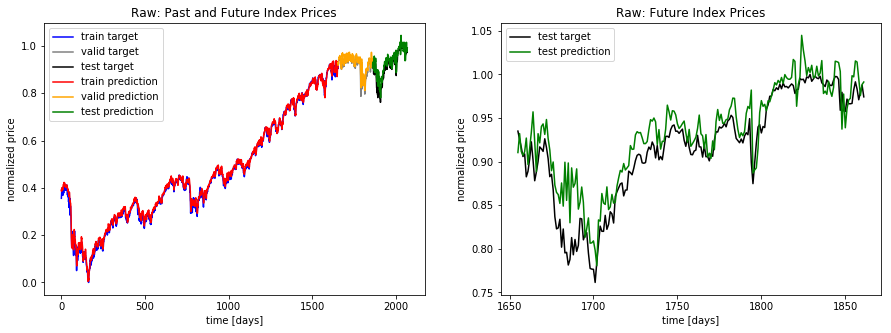

In [16]:
ft = 0 # 0 = close price

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Raw: Past and Future Index Prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Raw: Future Index Prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');
plt.savefig('Raw_pred.png',dpi=600,bbox_inches="tight")
corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,0]-y_train[:,1]),
            np.sign(y_train_pred[:,0]-y_train_pred[:,1])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,0]-y_valid[:,1]),
            np.sign(y_valid_pred[:,0]-y_valid_pred[:,1])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,0]-y_test[:,1]),
            np.sign(y_test_pred[:,0]-y_test_pred[:,1])).astype(int)) / y_test.shape[0]

# Calculate R square
SumRes = np.sum((y_test_pred[:,0] - y_test[:,0])**2)
Sumvar = np.var(y_test[:,0])*y_test.shape[0]
R_sq = 1 - SumRes/Sumvar
print('R_square:%.2f'% R_sq)
print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))
plt.show()